# Machine Learning con Python 2 - Métodos No Supervisados

## Semana 1 - Tarea

### Ejercicio 1

En este ejercicio vamos a usar la tabla de datos *SpotifyTop2018 40 V2.csv*, que contiene una lista de 40 de las canciones más reproducidas en Spotify en el año 2018. Los datos incluyen una serie de características importantes del audio de cada canción.

La tabla contiene 40 filas y 11 columnas, las cuales se explican a continuación.

* **danceability:** Describe que tan apta para bailar es la canción 
* **denergy:** Representa una medida de intensidad y actividad.
* **dloudness:** Sonoridad general de la pista en decibelios.
* **dspeechiness:** Detecta la presencia de palabras en la canción. 
* **dacousticness:** Indica que tan acústica es la canción. 
* **dinstrumentalness:** Indica si la canción contiene o no voces. 
* **dliveness:** Detecta la presencia de público en la grabación.
* **dvalence:** Describe la positividad musical transmitida por la canción. 
* **dtempo:** Es el tempo estimado general de una pista en beats por minuto. 
* **dduration_ms:** Es la duración de la canción en milisegundos.
* **dtime_signature:** Especifica cuantos beats hay en cada barra o medida. 

> **Nota:** Todas son variables numéricas y no tienen NAs. 

Realice lo siguiente:

1. Calcule el resumen numérico, interprete los resultados para dos variables. 
2. Realice el test de normalidad para una variable e interprete el resultado. 
3. Realice un gráfico de dispersión e interprete dos similitudes en el gráfico.
4. Para dos variables identifique los datos atípicos, si los hay.
5. Calcule la matriz de correlaciones, incluya alguna de las imágenes que ofrece Python e interpréte dos de las correlaciones. Debe ser una interpretación dirigida a una persona que no sabe nada de estadística.
6. Efectué un ACP y dé una interpretación siguiendo los siguientes pasos:
    * En el círculo de correlación determine la correlación entre las variables.
    * Explique la formación de los clústeres basado en la sobre-posición del círculo y el plano.
    * En el plano de los componentes 1 y 3 interprete las canciones In My Feelings, In My Mind, Havana, Candy Paint y HUMBLE, que son mal representadas en los componentes 1 y 2.

#### Inicialización de Clases Requeridas

In [1]:
from Main import Main
import matplotlib.pyplot as plt


folder = "/Users/rsalazar/Development/learning/machine_learning/module_2/week_1/homework/resources"
file   = "SpotifyTop2018_40_V2.csv"
alpha  = 0.5
debug  = False

main1 = Main(path = folder, name = file, alpha = alpha, debug = debug)

#### 1. Calcule el resumen numérico, interprete los resultados para dos variables

In [2]:
main1.execute_numeric_summary()

       danceability     energy   loudness  speechiness  acousticness  \
count     40.000000  40.000000  40.000000    40.000000     40.000000   
mean       0.719200   0.661925  -5.846250     0.121292      0.184621   
std        0.151423   0.137874   1.611051     0.094732      0.209052   
min        0.258000   0.391000  -9.211000     0.023200      0.000282   
25%        0.680500   0.564250  -7.077000     0.049550      0.030800   
50%        0.750000   0.659000  -5.930000     0.105500      0.121500   
75%        0.817500   0.772500  -4.624000     0.144500      0.227500   
max        0.922000   0.909000  -3.093000     0.516000      0.847000   

       instrumentalness   liveness    valence       tempo    duration_ms  \
count         40.000000  40.000000  40.000000   40.000000      40.000000   
mean           0.003695   0.177125   0.467943  122.108850  205645.700000   
std            0.021231   0.130476   0.228504   31.178064   34324.034325   
min            0.000000   0.021500   0.096700  

#### 2. Realice el test de normalidad para una variable e interprete el resultado

Test Saphiro-Wilk:
La grafica NO sigue la curva, la muestra NO proviene de una distribución normal
Test Kolmogorov-Smirnov:
La grafica NO sigue la curva, la muestra NO proviene de una distribución normal


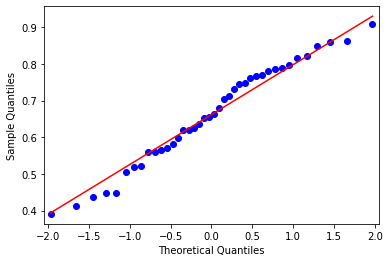

In [3]:
# Vamos a analizar la variable energy
figsize=(10, 8)
main1.execute_normality_test("energy")

> **Interpretación**  
La distribución de los valores tienen una disperción con respecto a la normal, por lo tanto los valores recogidos en la variable "energy" parecen no haber sido tomados de una distribución normal.

#### 3. Realice un gráfico de dispersión e interprete dos similitudes en el gráfico.

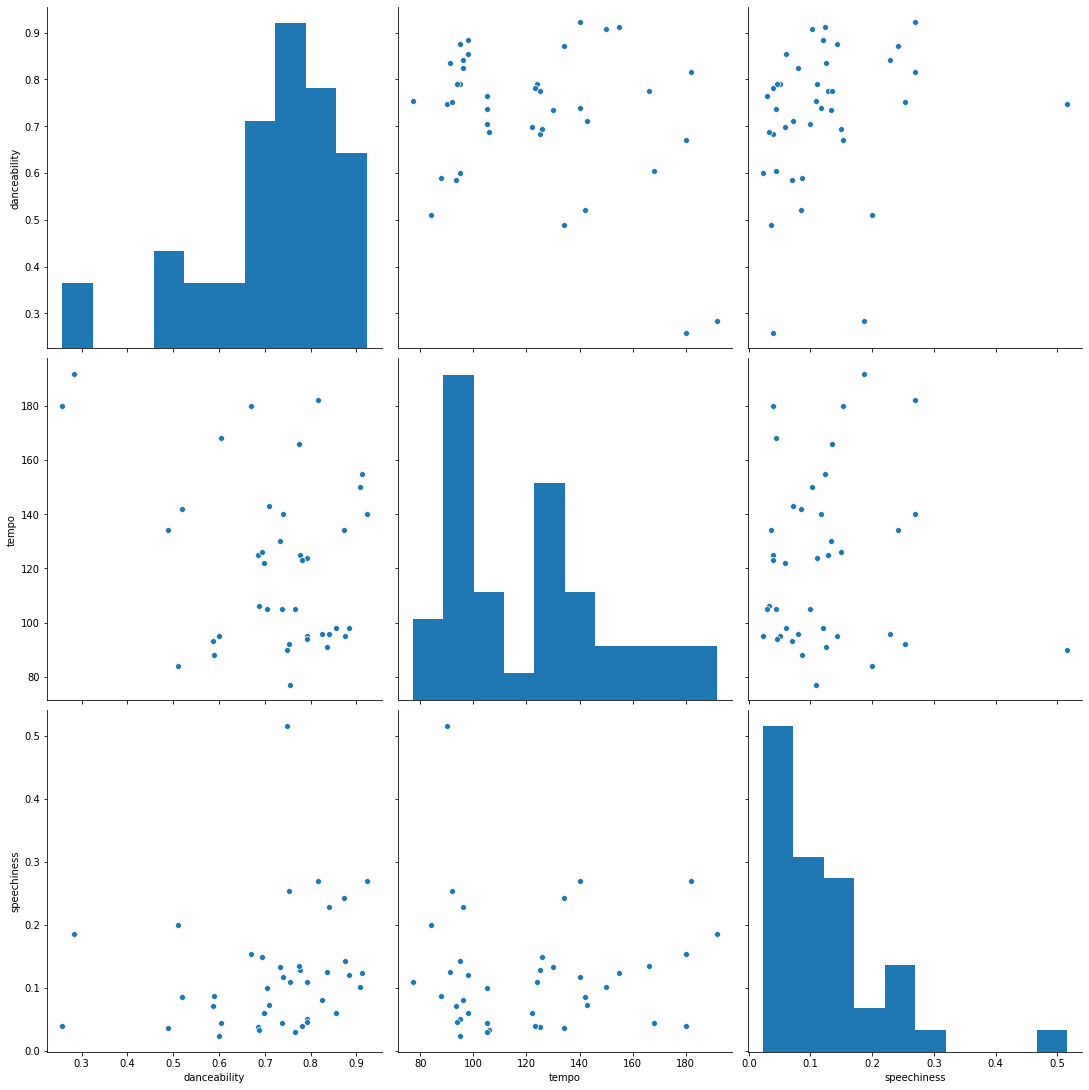

In [4]:
variable_names = ["danceability","tempo","speechiness"]
main1.execute_dispercsion_graphic(variable_names)

> **Interpretación**  
1. Se puede visualizar que las puntos de cruce entre *danceability* y *tempo* se encuentran en su mayoría en la parte superior de *danceability* y menor de *tempo*, por lo cual se puede decir que cuando una canción tiene un tiempo alto, se hace muy complicado de bailarla para una persona, esto se da debido a que, usualmente, las canciones con un tempo menor (mas lentas) pueden ser seguidas por personas con poca experiencia, al contrario que las más rápidas
2. La relación existente entre *speechiness** y *danceability* es que mientras mas vocal sea la canción, menos bailable es, de esto podemos sugerir que las canciones con mayor letra prefieren ser escuchadas que bailadas.

#### 4. Para dos variables identifique los datos atípicos, si los hay

> Vamos a analizar llas variables agrupadas por rangos de valores similares, esto hará mas fácil visualizar las variables que tengan datos atípicos:

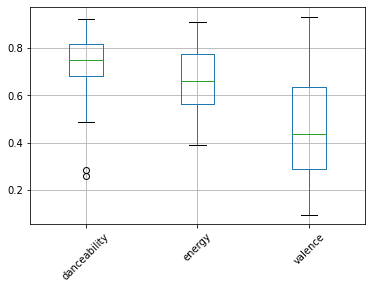

In [5]:
main1.execute_show_atipic_data(["danceability","energy", "valence"])

>Vemos que *danceability* tiene dos datos atípicos que corresponden a las canciones **Dusk_Till_Dawn_-_Radio_Edit** y **This_Is_Me** 

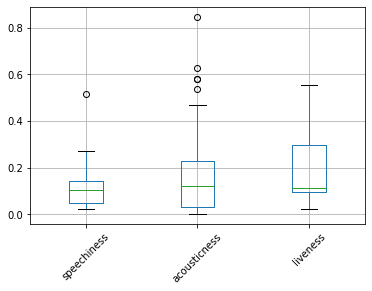

In [6]:
main1.execute_show_atipic_data(["speechiness", "acousticness", "liveness"])

> *Speechiness* tiene un dato atípico que sería el correspondiente a la canción **River_(feat._Ed_Sheeran)**

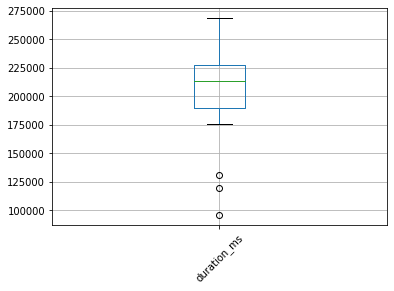

In [7]:
main1.execute_show_atipic_data(["duration_ms"])

> Adicionalmente tenemos en *duration_ms* tres canciones que tienen una duración muy baja en comparación con el resto, estas serían **Everybody_Dies_In_Their_Nightmares, Jocelyn_Flores y Mine**

#### 5. Calcule la matriz de correlaciones, incluya alguna de las imágenes que ofrece Python e interpréte dos de las correlaciones. Debe ser una interpretación dirigida a una persona que no sabe nada de estadística.

> **Matriz de correlación**

In [8]:
main1.execute_calculation_correlation_matrix()

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.052973 -0.043320     0.207397      0.016291   
energy               -0.052973  1.000000  0.665634    -0.035225     -0.269420   
loudness             -0.043320  0.665634  1.000000    -0.281621     -0.081194   
speechiness           0.207397 -0.035225 -0.281621     1.000000      0.097140   
acousticness          0.016291 -0.269420 -0.081194     0.097140      1.000000   
instrumentalness     -0.102198  0.159487  0.079780    -0.131971     -0.150742   
liveness             -0.031392 -0.082066 -0.050145    -0.225592     -0.155930   
valence               0.470648  0.465742  0.402273     0.059612      0.174967   
tempo                -0.301067  0.005003 -0.034438     0.018453     -0.064332   
duration_ms          -0.305303 -0.035215  0.011911    -0.144740     -0.297226   
time_signature        0.268821  0.234110 -0.032557     0.224884     -0.006534   

                  instrumen

> **Gráfico de la Matriz de Correlación**

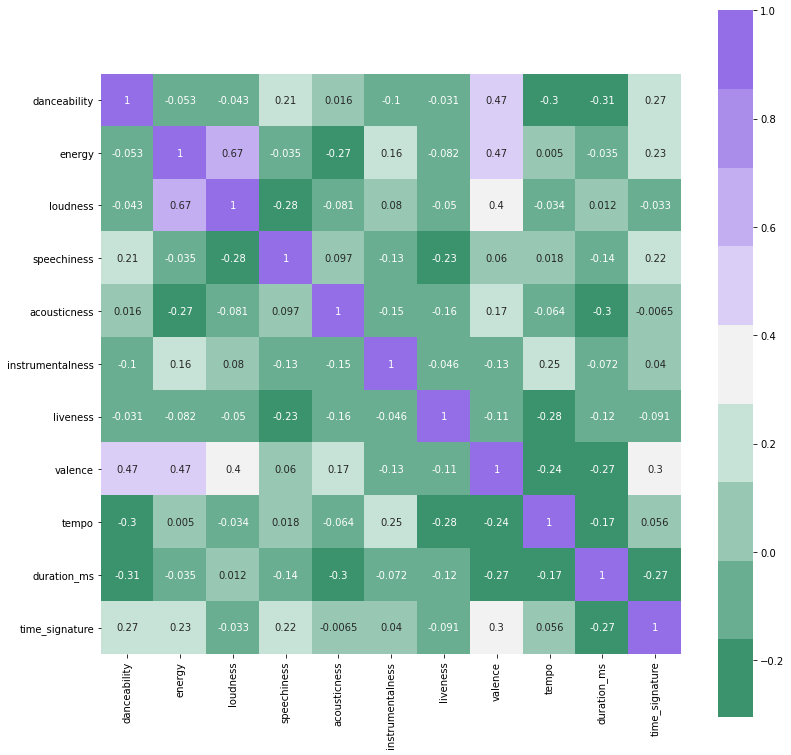

In [9]:
main1.execute_draw_correlation_matrix()

> **Interpretación**  
> En la matriz de correlación se encuentran de color verde mas oscudo conforme menos relacionadas las variables están, es decir, que no existen comportamientos que relacionen una variable con la otra, de esto podemos deducir:
1. La variable *energy* esta muy relacionada con la variable *loudiness*, podemos decir que una canción mientras mas alta esté mas energía transmite a la persona que la está escuchando, o que mientras mas enérgica está una persona, tiende a colocar música mas alta
2. Al contrario que con la variable *loudiness* la variable *energy* esta poco relacionada, es decir que no tiene nada que ver que una canción mientras más instrumentos acústicos estén sonando transmitan o no enería a la persona

#### 6. Efectué un ACP y dé una interpretación siguiendo los siguientes pasos:

##### En el círculo de correlación determine la correlación entre las variables:

In [10]:
main1.show_correlation_values()

                                                      0         1         2
name                                                                       
Dura                                          -2.158016 -1.298592 -1.826558
Plug_Walk                                      0.440042  1.566524 -0.112412
Silence                                       -0.129625 -1.455367  0.746510
Solo_(feat._Demi_Lovato)                      -0.238512 -0.854628 -1.454895
Sin_Pijama                                    -2.146927 -0.437891 -0.756985
Call_Out_My_Name                               3.305340 -1.771822 -1.588707
Taki_Taki_(with_Selena_Gomez_Ozuna_&_Cardi_B) -1.719642 -0.137449 -0.158241
River_(feat._Ed_Sheeran)                      -1.442549  1.459012  0.507475
Rewrite_The_Stars                              1.055307 -0.131063  0.108222
Him_&_I_(with_Halsey)                          1.400136 -1.070508 -1.347914
Look_Alive_(feat._Drake)                      -0.614537  1.758094  0.892328
Rise        

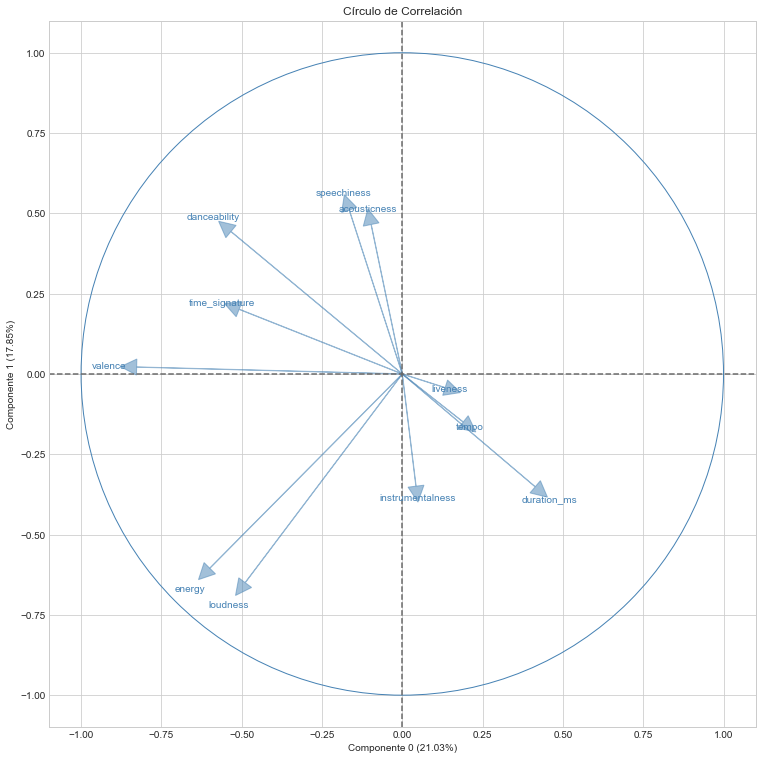

In [11]:
main1.show_correlation_circle()

> **Variables relacionadas:**
1. liveness, tempo, duration_ms, instrumentalness
2. energy, loudness
3. spechiness, acousticness
4. Danceability, time_signature, valence

##### Explique la formación de los clústeres basado en la sobre-posición del círculo y el plano

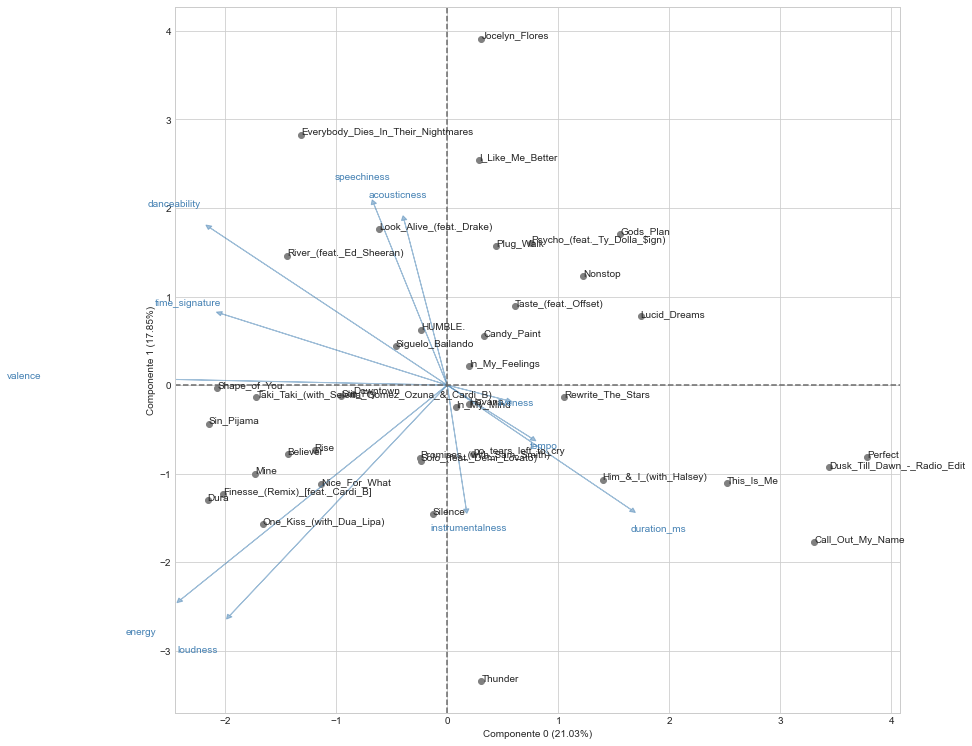

In [12]:
main1.show_superposition()

> Se visualizan los siguientes clusters

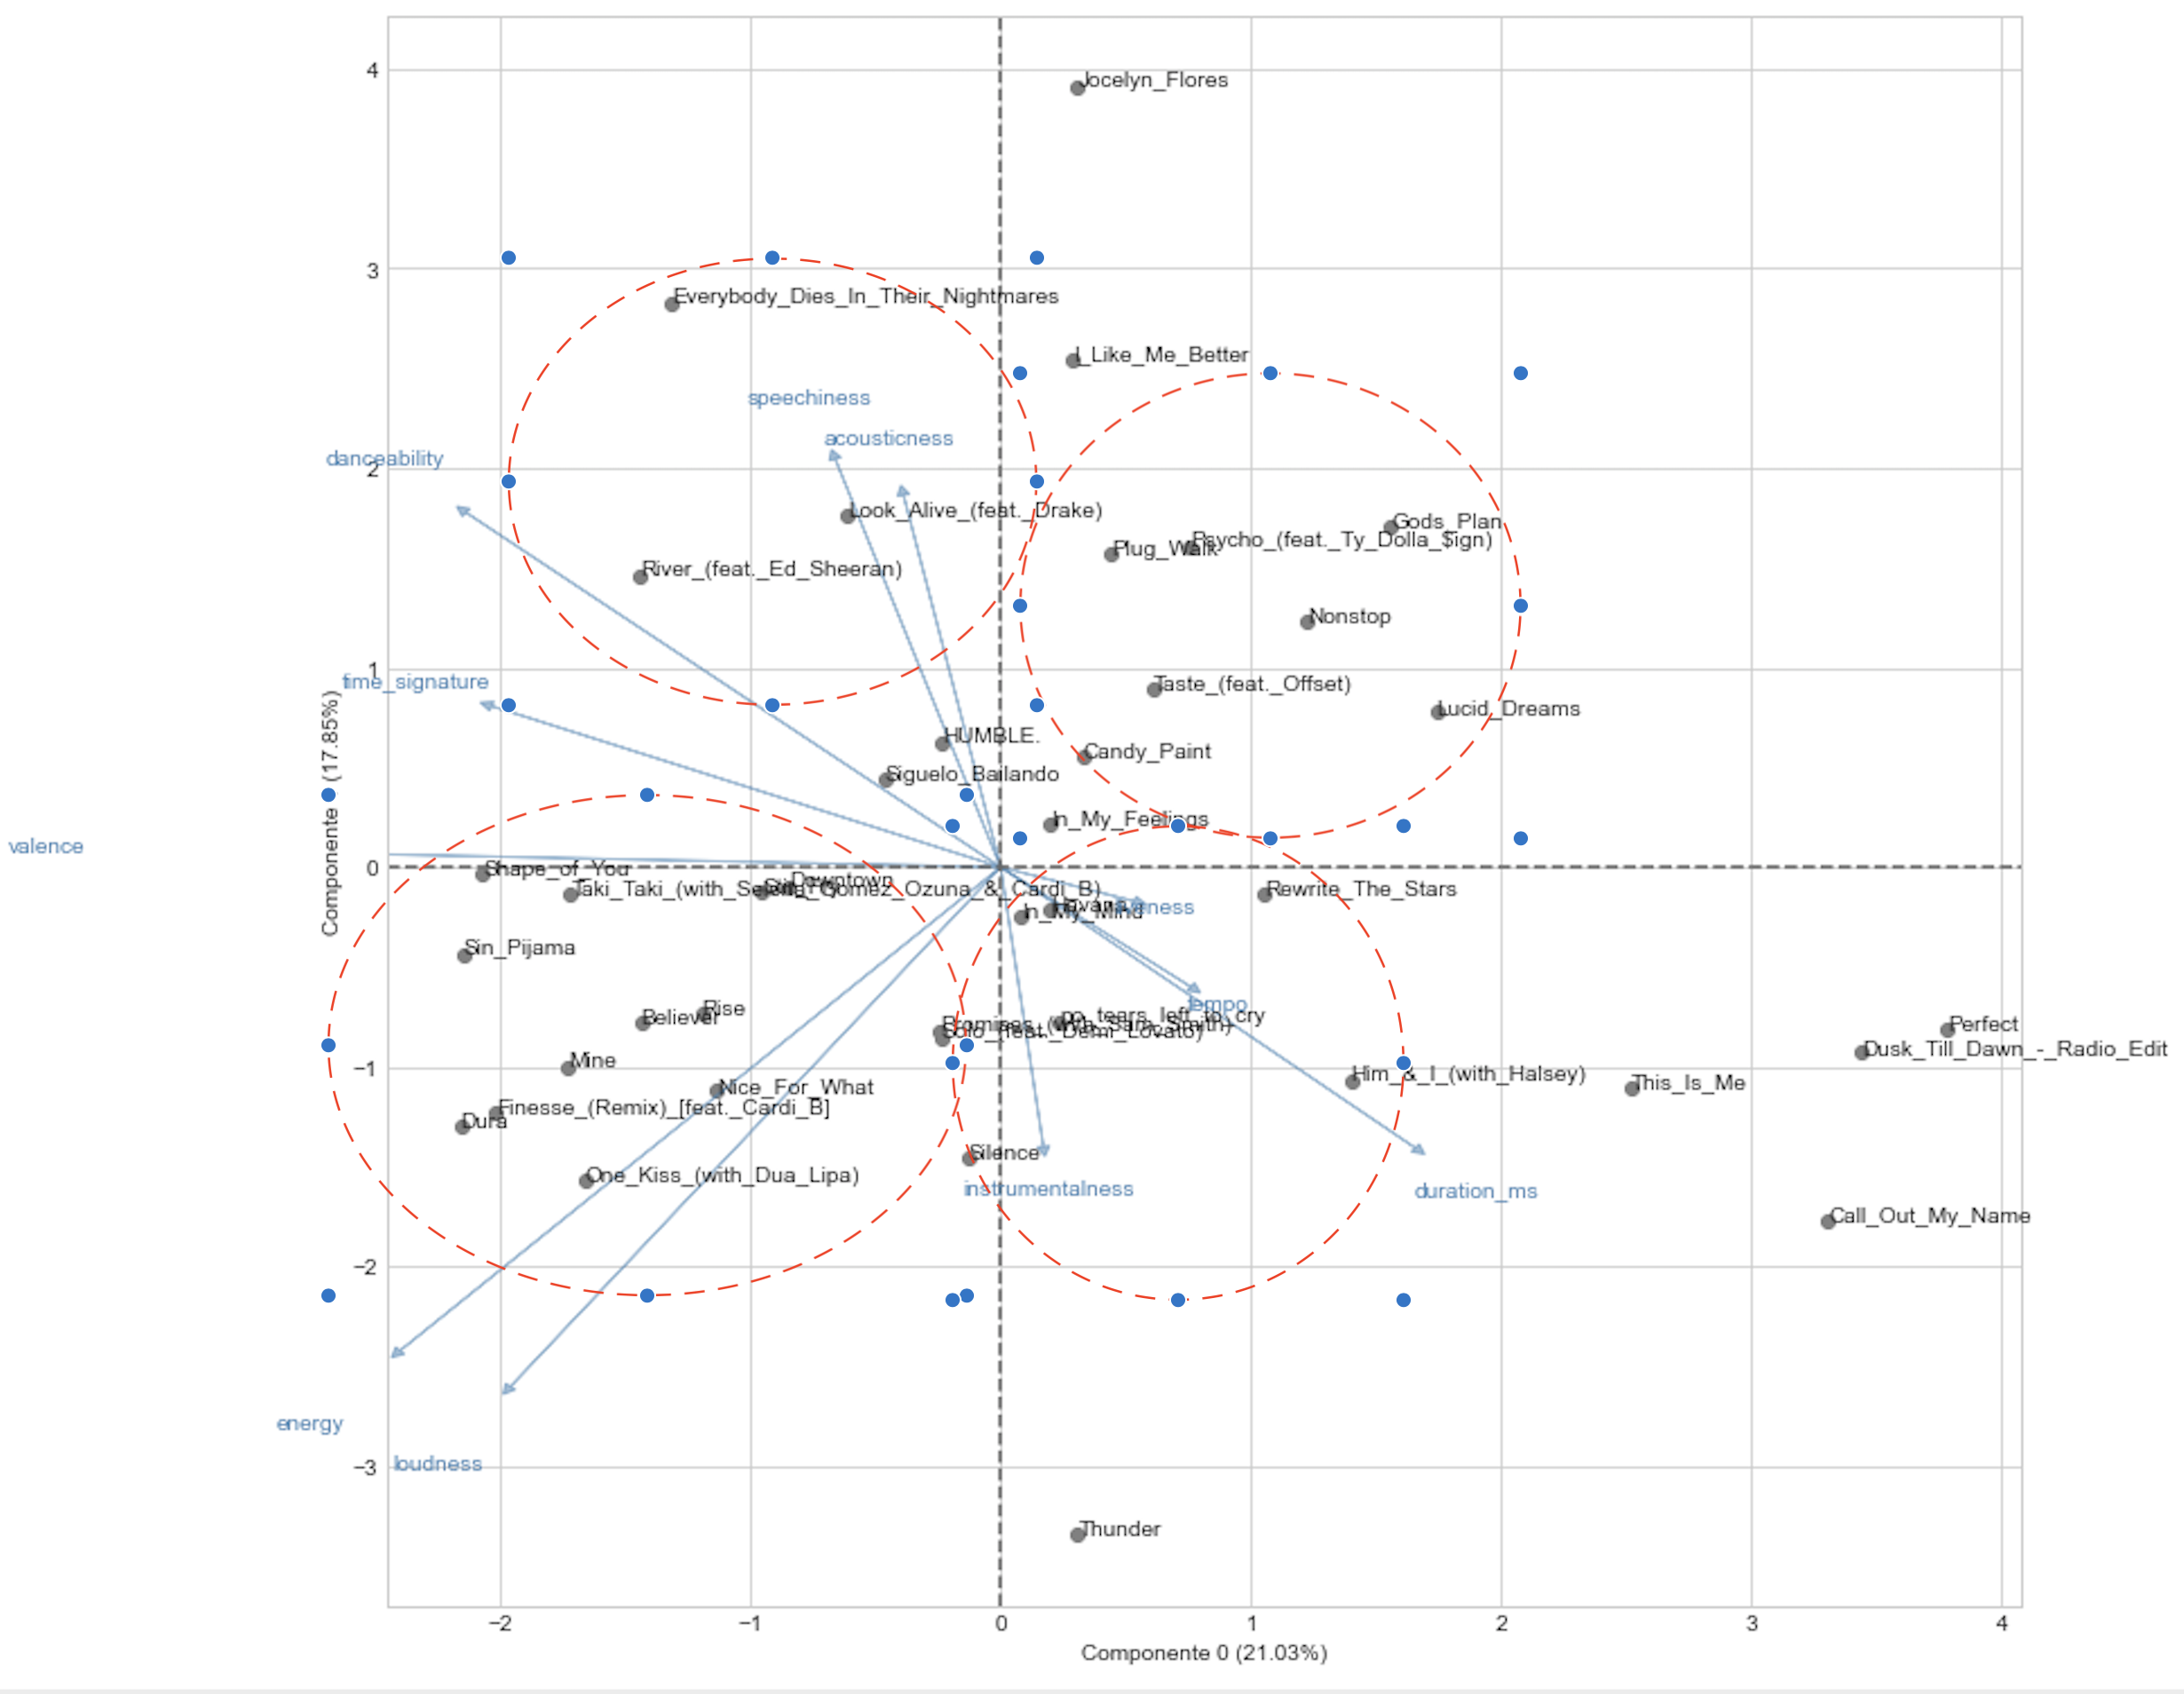

##### En el plano de los componentes 1 y 3 interprete las canciones In My Feelings, In My Mind, Havana, Candy Paint y HUMBLE, que son mal representadas en los componentes 1 y 2

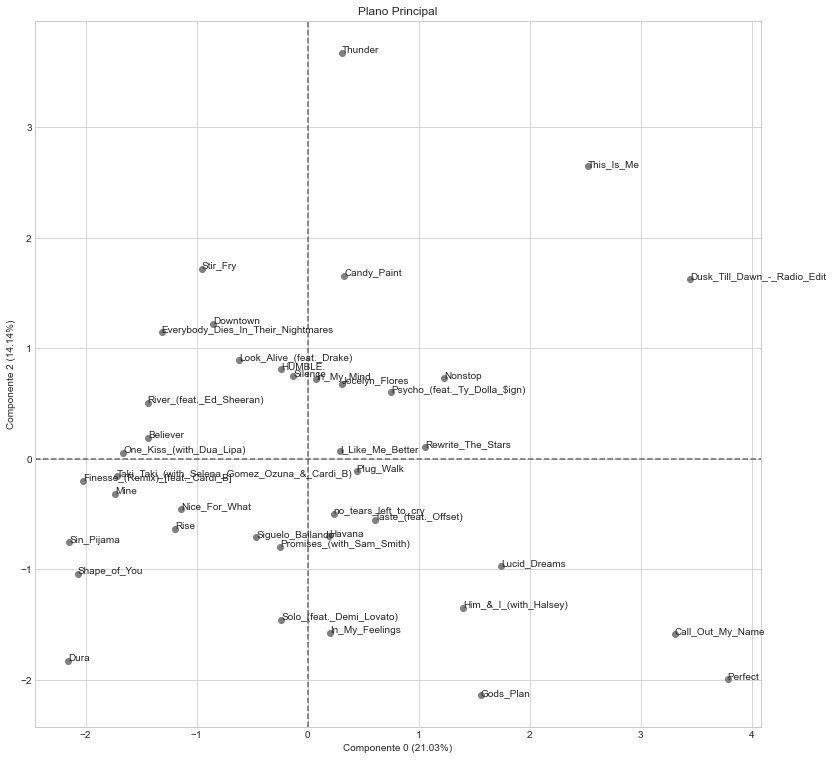

In [13]:
main1.show_correlation_flat(ejes = [0, 2])

> Las canciones **In My Feelings, Havana** estan relacionadas entre sí, y no relacionadas con las canciones **In My Mind, Candy Paint y HUMBLE** que a su vez están relacionadas entre ellas, el primer conjunto tiende a ser de canciones instrumentales debido a que el círculo muestra un vector en esa posición, mientras que el segundo grupo tiende a ser de canciones acústicas

***

### Ejercicio 2

En este ejercicio vamos a usar los datos *TablaAffairs.csv*, los cuales recopilan información sobre infidelidades en parejas casadas, como lo es la edad de la persona, años de casado y el nivel de educación.

La tabla contiene 601 filas y 9 columnas, las cuales se explican a continuación.

* **TiempoInfiel:** Medida del tiempo que pasó en la relación fuera del matrimonio. Genero: Género del individio
* **Edad:** Edad del individuo
* **AnnosCasado:** Años que lleva casado
* **Hijos:** Indica si hay hijos en el matrimonio o no.
* **Religioso:** Indice del grado de religiosidad. Entre más alto más religioso.
* **Educacion:** Indice del grado de educación. Entre más alto, mayor educación.
* **Ocupacion:** Indica la categoría de ocupación de la persona. Valoracion: Valoración que da el individuo al matrimonio.

Realice lo siguiente:

1. Calcule el resumen numérico, interprete los resultados para una variable.
2. Calcule la matriz de correlaciones, incluya alguna de las imágenes que ofrece Python e interpréte dos de las correlaciones. Debe ser una interpretación dirigida a una persona que no sabe nada de estadística.
3. Usando solo las variables numéricas efectué un ACP y dé una interpretación siguiendo los siguientes pasos: a) en el plano principal encuentre 4 clústeres, b) en el círculo de correlación determine la correlación entre las variables y c) explique la formación de los clústeres basado en la sobre-posición del círculo y el plano.
4. Ahora convierta las variables Género e Hijos en Código Disyuntivo Completo y repita el ACP ¿Se gana interpretabilidad al convetir Género e Hijos en Código Disyuntivo Completo?

In [14]:
file2   = "TablaAffairs.csv"
alpha  = 0.5
debug  = True

colums_to_decode = [
    ["Genero", {"male": 0, "female": 1}],
    ["Hijos", {"no": 0, "yes": 1}],
    ["Valoracion", {"muy infeliz": -2, "infeliz": -1, "neural": 0, "feliz": 1, "muy feliz": 2}],
]

main2 = Main(path = folder, name = file2, alpha = alpha, debug = debug, delimiter = ";", decimal = ".", quotechar = "\"", colums_to_decode = colums_to_decode)

#### 1. Calcule el resumen numérico, interprete los resultados para una variable.

In [15]:
main2.execute_numeric_summary()

       TiempoInfiel      Genero        Edad  AnnosCasado       Hijos  \
count    601.000000  601.000000  601.000000   601.000000  601.000000   
mean       1.455907    0.524126   32.487521     8.177696    0.715474   
std        3.298758    0.499834    9.288762     5.571303    0.451564   
min        0.000000    0.000000   17.500000     0.125000    0.000000   
25%        0.000000    0.000000   27.000000     4.000000    0.000000   
50%        0.000000    1.000000   32.000000     7.000000    1.000000   
75%        0.000000    1.000000   37.000000    15.000000    1.000000   
max       12.000000    1.000000   57.000000    15.000000    1.000000   

        Religioso   Educacion   Ocupacion  Valoracion  
count  601.000000  601.000000  601.000000  601.000000  
mean     3.128286   16.185042    4.194676    0.931780  
std      1.206544    2.427380    1.819443    1.103179  
min      0.510000    8.890000    1.000000   -2.000000  
25%      2.110000   14.270000    3.000000    0.000000  
50%      3.2000

> **Interpretación**  
Colocar interpretación

#### 2. Calcule la matriz de correlaciones, incluya alguna de las imágenes que ofrece Python e interpréte dos de las correlaciones. Debe ser una interpretación dirigida a una persona que no sabe nada de estadística

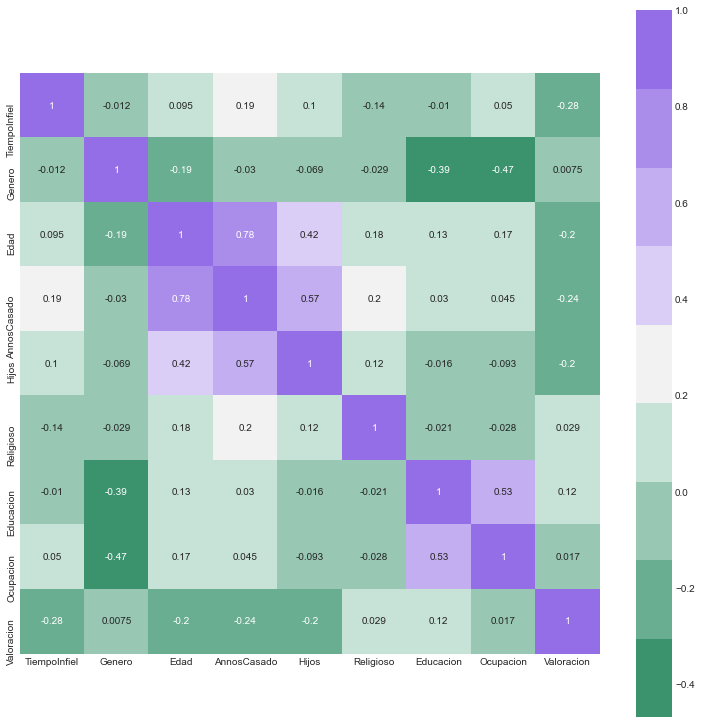

In [16]:
main2.execute_draw_correlation_matrix()

> **Interpretación**  
La relación de los colores es al igual que en el ejercicio 1 verde o violeta dependiendo de su correlación o no, en esta matriz se puede interpretar las siguientes correlaciones
1. La edad y los años casados tienen una fuerte correlación, y tiene lógica debido a que la tendencia es esa en la vida real
2. Tiene cierto nivel de relación la religiosidad con los años casado, lo cual implica que las familias que son mas religiosas tienden a tratar de mantener los matrimonios a travez de los años

#### 4. Usando solo las variables numéricas efectué un ACP y dé una interpretación siguiendo los siguientes pasos:
##### a) en el plano principal encuentre 4 clústeres

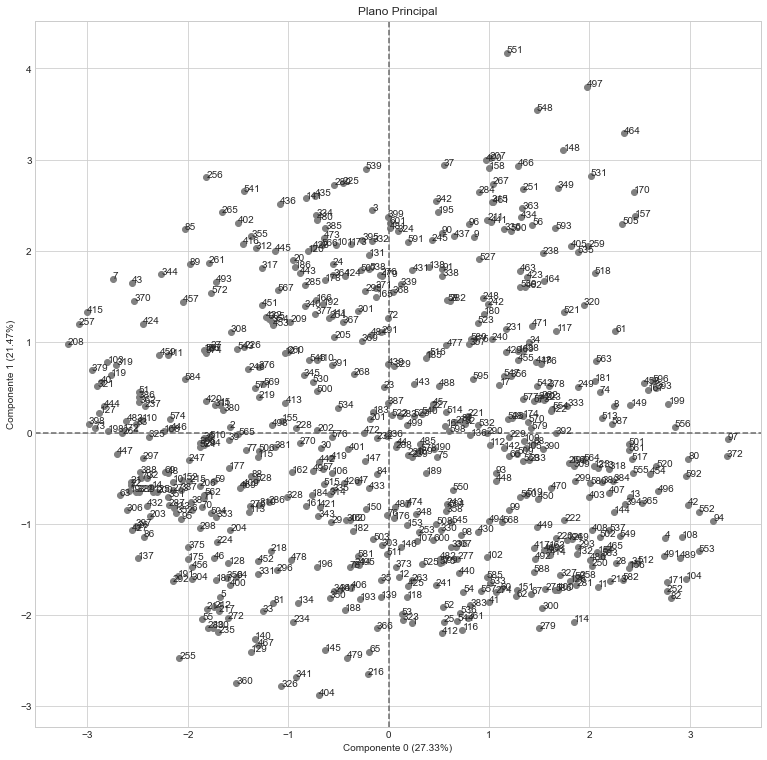

In [17]:
main2.show_correlation_flat([0,1])

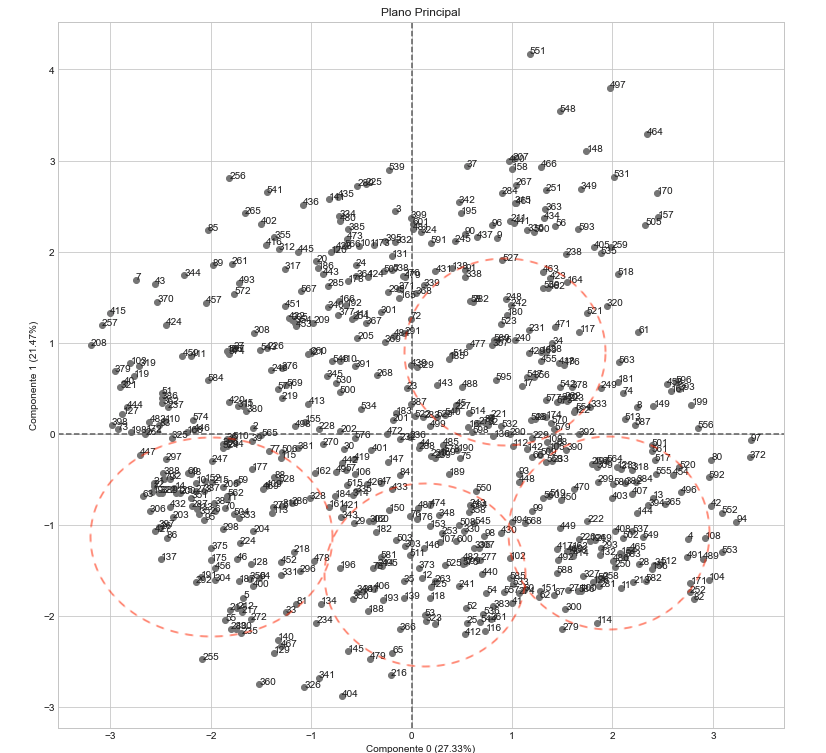

##### b) en el círculo de correlación determine la correlación entre las variables

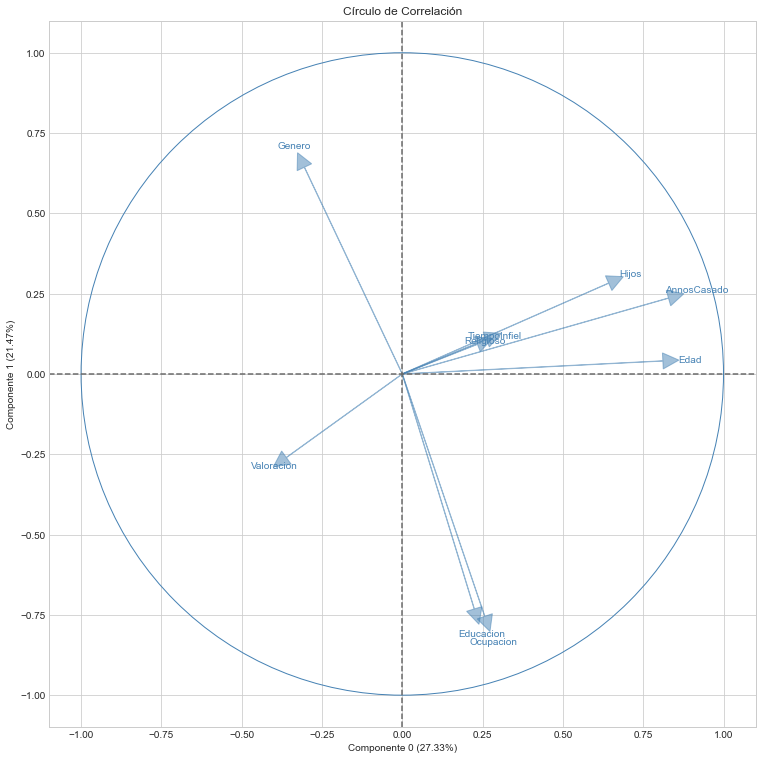

In [18]:
main2.show_correlation_circle()

> Correlaciones entre variables:
1. hijos, AnnosCasado, Edad muy correlacionadas, y en menor medida estas varialbles con TiempoInfiel y Religioso
2. Educación y Ocupación
3. Genero y valoracion no tienen relaciones con otras variables, pero si correlacion contraria, por ejemplo género es contrario a Educacion y Ocupación
4. Valoración tiende al contrario de las variables en el punto 1

##### c) explique la formación de los clústeres basado en la sobre-posición del círculo y el plano

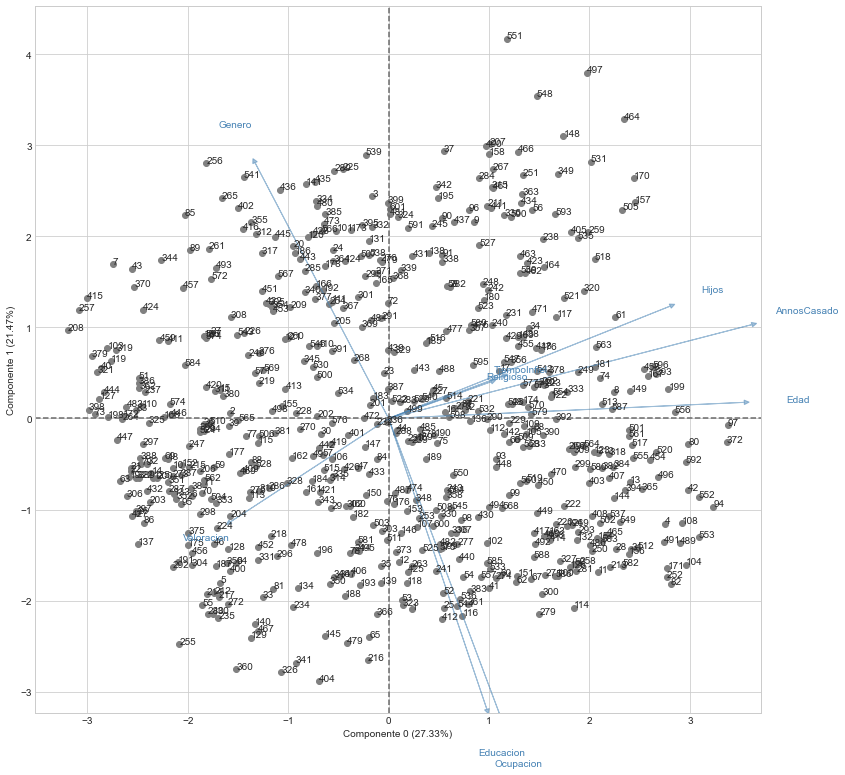

In [19]:
main2.show_superposition([0,1])

> **Explicación**  
1. Utilizando los vectores de Educación y Ocupación identificamos claramente un cluster, se puede determinar que las personas que tienen una educación mas formal tienden a mantenerse en los trabajos la mayoría del tiempo y eso independientemente del género al que pertenezcan
2. Otra tendencia importante es hacia Valoración, las personas que se valoran más (de acuerdo a la gráfica) tienden a no casarse ni tener hijos, esto puede ser por muchos factores, prefieren invertir en si mismos, viajar, etc.

***

### Ejercicio 3

En este ejercicio vamos a realizar un ACP para la tabla *SAheart.csv* la cual contiene variables numéricas y categóricas mezcladas. La descripción de los datos es la siguiente: 

Datos Tomados del libro: The Elements of Statistical Learning Data Mining, Inference, and Prediction de Trevor Hastie, Robert Tibshirani y Jerome Friedman de la Universidad de Stanford. Example: South African Heart Disease: A retrospective sample of males in a heart disease high risk region of the Western Cape, South Africa. There are roughly two controls per case of coronary heart disease. Many of the coronary heart disease positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their coronary heart disease event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. Below is a description of the variables: 

* **sbp:** systolic blood pressure (numérica)
* **tobacco:** cumulative tobacco (kg) (numérica)
* **ldl:** low densiity lipoprotein cholesterol (numérica)
* **Adiposity:** adiposity (numérica)
* **famhist:** family history of heart disease (Present, Absent) (categórica) 
* **typea:** type-A behavior (numérica)
* **Obesity:** obesity (numérica)
* **alcohol:** current alcohol consumption (numérica)
* **age:** age at onset (numérica)
* **chd:** coronary heart disease (categórica) 

Las dos variables categóricas se explican como sigue: famhist significa que hay historia familiar de infarto y que la variable chd significa que la persona murió de enfermedad cardíaca coronaria. Realice lo siguiente: 

1. Efectué un ACP usando solo las variables numéricas y dé una interpretación siguiendo los siguientes pasos: 
    * En el plano principal encuentre los clústeres.
    * En el círculo de correlación determine la correlación entre las variables,
    * Explique la formación de los clústeres basado en la sobreposición del círculo y el plano. 
2. Efectué un ACP usando las variables numéricas y las variables categóricas (recuerde recodificar las categóricas usando código disyuntivo completo). Luego dé una interpretación siguiendo los siguientes pasos: 
    * En el plano principal encuentre los clústeres.
    * En el círculo de correlación determine la correlación entre las variables, 
    * Explique la formación de los clústeres basado en la sobre-posición del círculo y el plano.
    * Explique las diferencias de este ACP respecto al anterior (usando solo las variables numéricas. ¿Cúal le parece más interesante? ¿Por qué? 



In [20]:
file3   = "SAheart.csv"
numeric_columns = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]

main3_1 = Main(path = folder, name = file3, alpha = alpha, debug = debug, delimiter = ";", decimal = ".", columns_to_include = numeric_columns, index_col = False)

#### 1. Efectué un ACP usando solo las variables numéricas y dé una interpretación siguiendo los siguientes pasos:
##### En el plano principal encuentre los clústeres

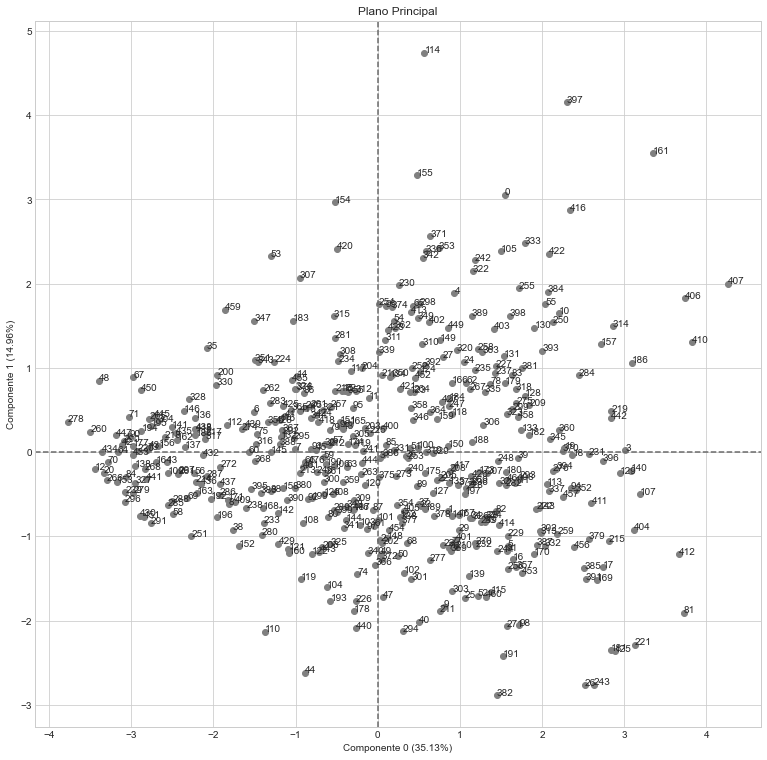

In [21]:
main3_1.show_correlation_flat()

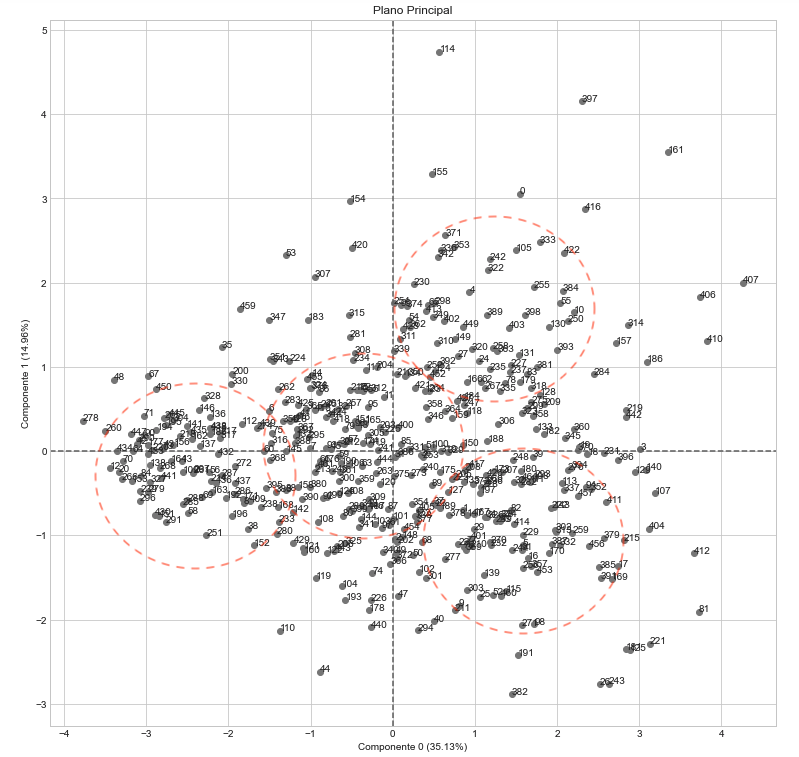

##### En el círculo de correlación determine la correlación entre las variables

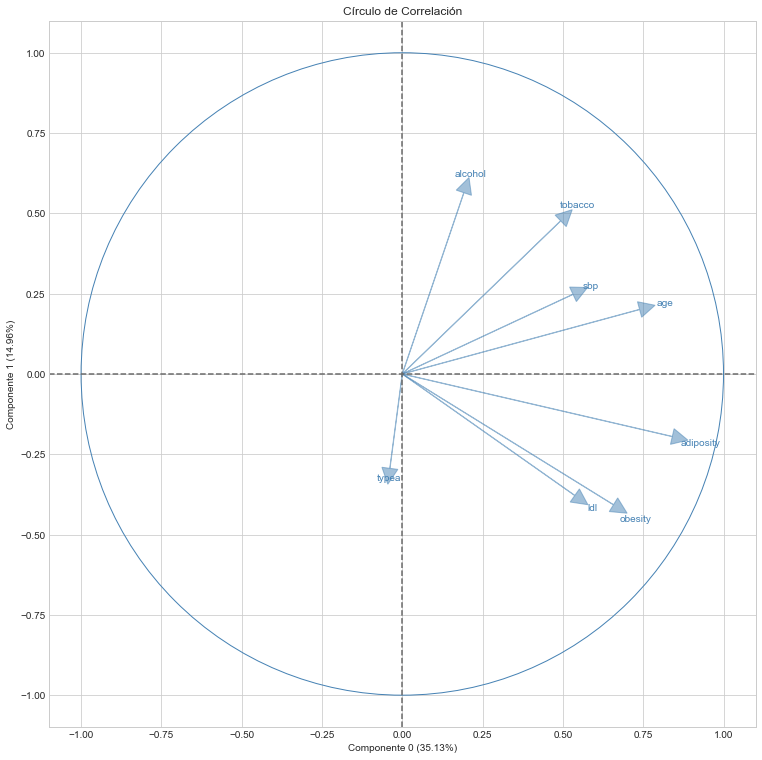

In [22]:
main3_1.show_correlation_circle()

>**Correlaciones**
1. Podemos ver que existen 3 conjuntos de correlaciones, en el cuadrante I vemos las variables **alcohol, tobacco, sbp y age** que tienen una relacion muy estrecha, claramente es evidencia de que las personas con el paso del tiempo empiezan a consumir alcohol y el cigarrillo, como consecuencia la presión sanguínea va en aumento
2. El IV cuadrante vemos que de igual manera ciertos factores que tienen que ver con una mala alimentación que genera enfermedades cardiobasculares como colesteról y exeso de grasa en el cuerpo, estos factores estan muy relacionados y pueden causar problemas cardíacos
3. En el cuadrante III esta el tipo de personas que mantienen un ritmo de vida acelerado y que tienen niveles de estrés altos, estan poco correlacionados con el tipo de personas que tienen la costumbre de consumir alcohol, esto se debe a que este tipo de personas son generalmente intensas con el trabajo y se autoexigen mucho

##### Explique la formación de los clústeres basado en la sobreposición del círculo y el plano

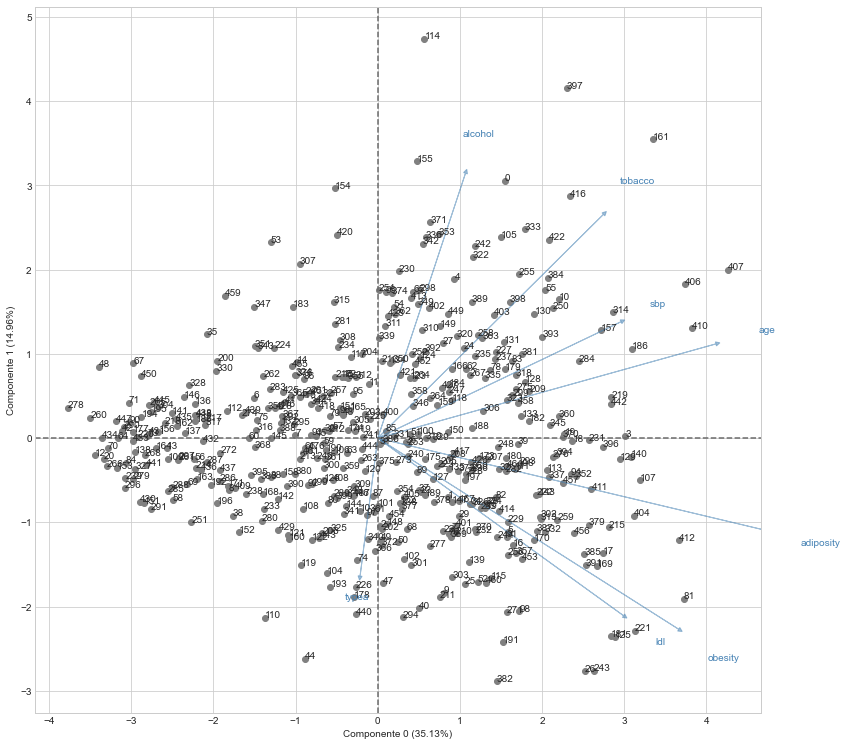

In [23]:
main3_1.show_superposition()

> 1. El cluster identificado en el cuadrante I es de los casos que tienen relación con tabaco y alcohol, este alto número en el cluster evidencia estas variables influyen muy directamente en el numero de casos
2. Se nota que el cluster identificado entre el II y III cuadrante es de personas que generalmente no tienen costumbres como alcohol, tabaco o mala alimentación sin embargo existe un número alto de casos que padecen de esta patología
2. El cluster identificado en el cuadrante IV evidencia un número alto de casos de personas que tienden a tener esta enfermedad debido a mala alimentación

#### 2. Efectué un ACP usando las variables numéricas y las variables categóricas (recuerde recodificar las categóricas usando código disyuntivo completo). Luego dé una interpretación siguiendo los siguientes pasos:
##### En el plano principal encuentre los clústeres

In [24]:

colums_to_decode = [
    ["famhist", {"Absent": 0, "Present": 1}],
    ["chd", {"No": 0, "Si": 1}]
]

main3_2 = Main(path = folder, name = file3, alpha = alpha, debug = debug, delimiter = ";", decimal = ".", colums_to_decode = colums_to_decode, index_col = False)

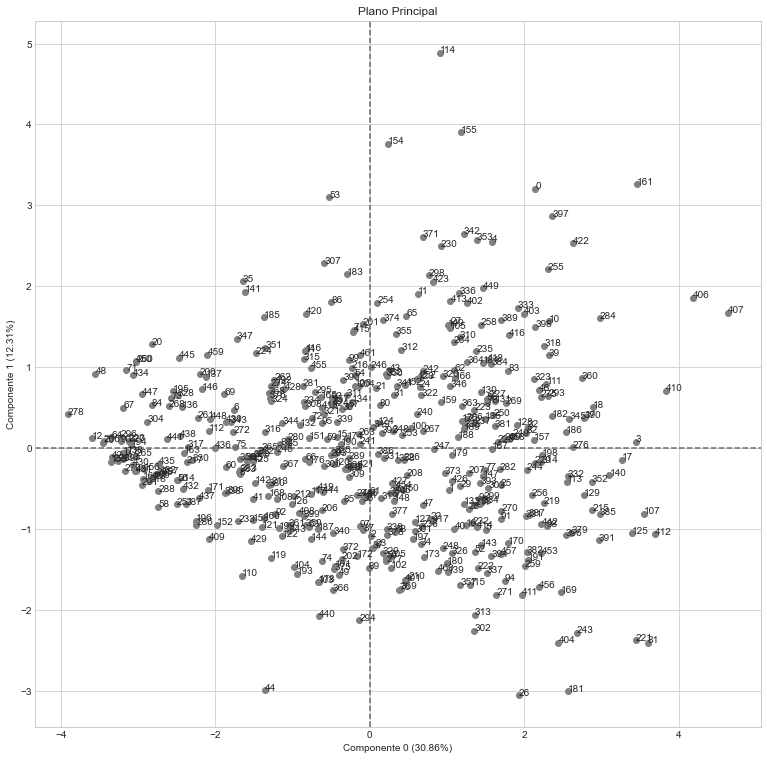

In [30]:
main3_2.show_correlation_flat()

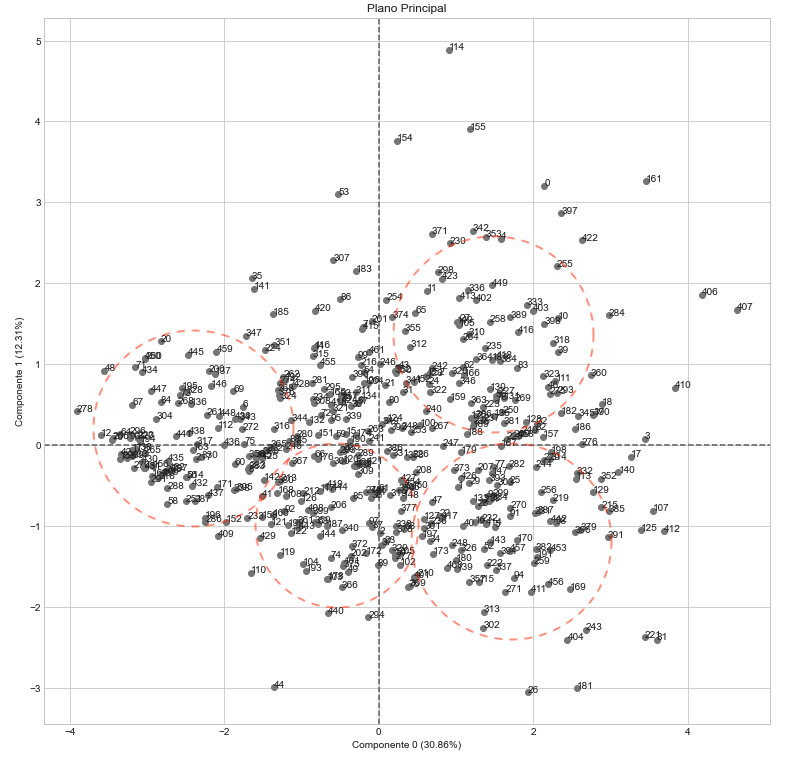

##### En el círculo de correlación determine la correlación entre las variables

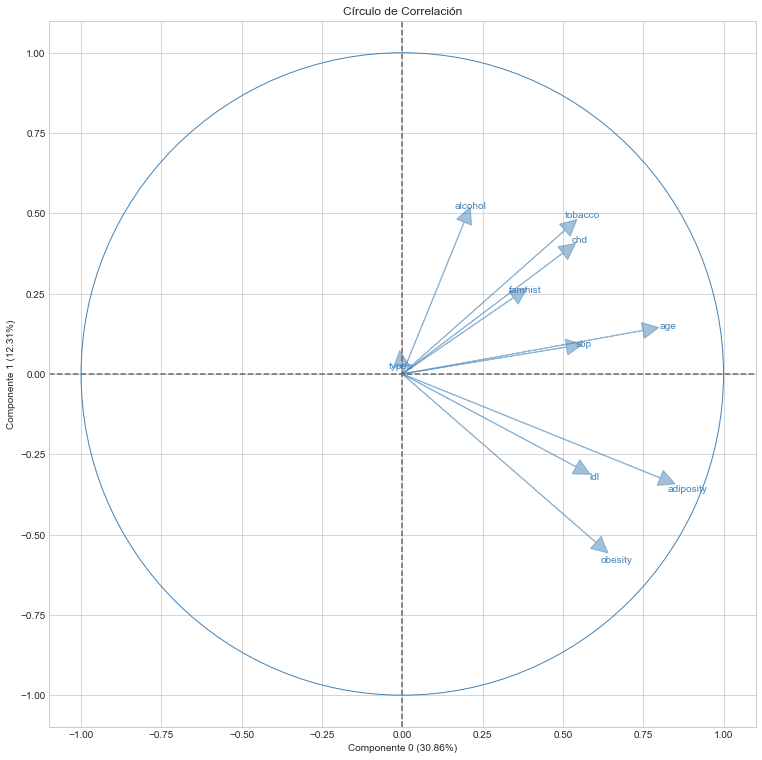

In [25]:
main3_2.show_correlation_circle()

> Respuesta

##### Explique la formación de los clústeres basado en la sobre-posición del círculo y el plano

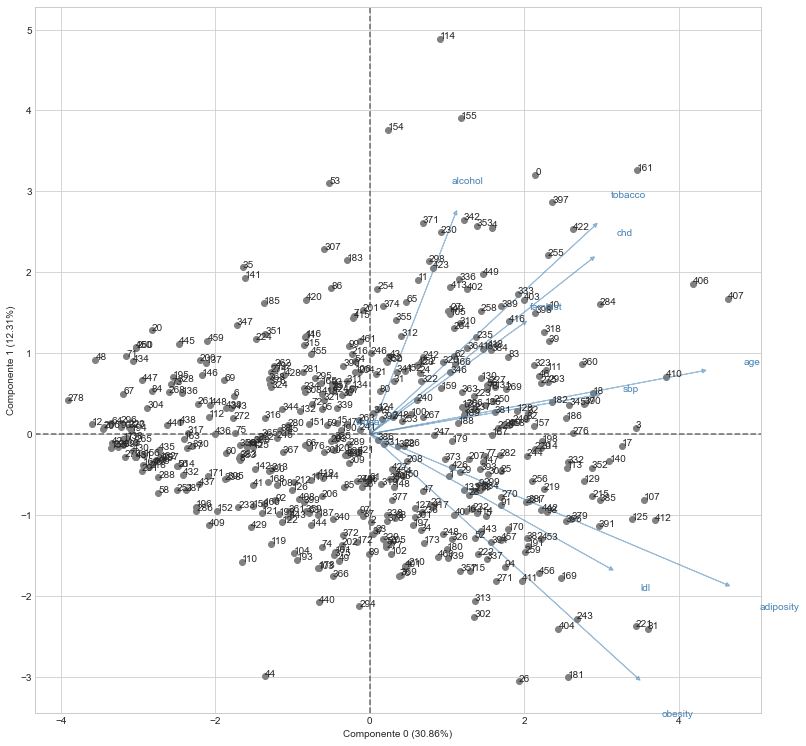

In [26]:
main3_2.show_superposition()

> 1. Al parecer, luego de incluir las variables **chd (enfermedad) y famhis (historia familiar)** nos damos cuenta de que en ese cuadrante se encuentran muy relacionadas con los problemas de alcohol y tabaco, sin embargo la presión sanguínea
2. Edad y presión sanguínea estan myt relacioadas, claramente eo se evidencia por el deterioro de las arterias debido a la edad
3. El estilo de vida type-A muy intenso esta relacionado negativamente con la obesidad y problemas de grasa corporal, esto puede ser debido a que las personas con ese carácter son muy activas y se mantienen siempre ocupadas y se sobreexigen en varios aspectos de la vida diaria

##### Explique las diferencias de este ACP respecto al anterior (usando solo las variables numéricas. ¿Cúal le parece más interesante? ¿Por qué?

> **Diferencias**
1. Al incluir la variable enfermedad e historial familiar se relacionan mas estrechamente las variables alcohol y tabaco, claramente este tipo de comportamiento influye directamente en problemas del corazón
2. Al contrario que en el primer análisis, el tipo de personas con caracter type-A empiezan a mostrar cierta relación con personas que toman alcohol y suelen tener problemas de cardíacos, esto se puede interpretar como una relación estrés-enfermedad, adicionalmente se separa la relación con obesidad que aunque mínima en el anterior ejemplo existía, se podría interpretar esto con que las personas que se dedican mucho a trabajar, suelen tener poco tiempo para alimentarse, en consecuencia los problemas cardíacos podrían derivar en poca alimentación y mucho estrés

**Respuesta**  
En el primer ejemplo se nota solamente comportamientos de las personas y cierta evidencia en su apariencia, no se visualizaba las consecuencias de esos comportamientos, definitivamente se puede hacer ciertas predicciones teniendo esas variables extras y dar una estadística mas clara cerca del comportamiento y sus consecuencias.

***

### Ejercicio 4

Programe una clase derivada (que herede) de la clase class ACP, que fue presentada durante la lección, que incluya adicionalmente lo siguiente:

1. Que sobrecargue el constructor de la clase init para seleccionar variables, es decir, que reciba adicionalmente un vector con los nu ́meros de una columna o nombres de la variables respectivas de manera que el atributo datos sea modificado para eliminar esas columnas. Y así todos los cálculos sean realizados eliminando estas columnas.
2. Que sobrecargue los métodos plot plano principal y plot sobreposicion de manera tal que en estos gráficos se puedan eliminar individuos mal representados, esto basado en en el cos2(x) mediante el atributo **cos2_ind**. Es decir, que estos métodos reciban un parámetro adicional que el es porcentaje mínimo en el coseno cuadrado aceptable para que los individuos aparezcan en estos gráficos.
3. Verifique la nueva clase programada con los datos del ejercicio 1

#### Clase ACP personalizada

In [27]:
from utils.ACP import ACP
import pandas as pandas
import matplotlib.pyplot as plt

class ACPPersonalizado(ACP):

    # Constructor
    def __init__(self, datos, n_componentes = 5, columnas = []):
        datos_filtrados = pandas.DataFrame(datos, columns = columnas)
        super().__init__(datos = datos_filtrados, n_componentes = n_componentes)

    def plot_plano_principal(self, ejes = [0, 1], ind_labels = True, titulo = 'Plano Principal', cos2_min = 0):
        bien_representados = self.__obtener_bien_representados(ejes, cos2_min)
        coordenadas_bien_representados = self.coordenadas_ind[self.coordenadas_ind.index.isin(values = bien_representados)]
        x = coordenadas_bien_representados[ejes[0]].values
        y = coordenadas_bien_representados[ejes[1]].values
        plt.style.use('seaborn-whitegrid')
        plt.scatter(x, y, color = 'gray')
        plt.title(titulo)
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.var_explicada[ejes[0]], 2)
        inercia_y = round(self.var_explicada[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        if ind_labels:
            for i, txt in enumerate(coordenadas_bien_representados.index):
                plt.annotate(txt, (x[i], y[i]))

    def plot_sobreposicion(self, ejes = [0, 1], ind_labels = True, 
                      var_labels = True, titulo = 'Sobreposición Plano-Círculo', cos2_min = 0):
        bien_representados = self.__obtener_bien_representados(ejes, cos2_min)
        coordenadas_bien_representados = self.coordenadas_ind[self.coordenadas_ind.index.isin(values = bien_representados)]
        x = coordenadas_bien_representados[ejes[0]].values
        y = coordenadas_bien_representados[ejes[1]].values
        cor = self.correlacion_var.iloc[:, ejes]
        scale = min((max(x) - min(x)/(max(cor[ejes[0]]) - min(cor[ejes[0]]))), 
                    (max(y) - min(y)/(max(cor[ejes[1]]) - min(cor[ejes[1]])))) * 0.7
        cor = self.correlacion_var.iloc[:, ejes].values
        plt.style.use('seaborn-whitegrid')
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.var_explicada[ejes[0]], 2)
        inercia_y = round(self.var_explicada[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        plt.scatter(x, y, color = 'gray')
        if ind_labels:
            for i, txt in enumerate(coordenadas_bien_representados.index):
                plt.annotate(txt, (x[i], y[i]))
        for i in range(cor.shape[0]):
            plt.arrow(0, 0, cor[i, 0] * scale, cor[i, 1] * scale, color = 'steelblue', 
                      alpha = 0.5, head_width = 0.05, head_length = 0.05)
            if var_labels:
                plt.text(cor[i, 0] * scale * 1.15, cor[i, 1] * scale * 1.15, 
                         self.correlacion_var.index[i], 
                         color = 'steelblue', ha = 'center', va = 'center')  

    def __obtener_bien_representados(self, ejes, cos2_min):
        return super().cos2_ind.loc[lambda df: (df[ejes[0]] >= cos2_min) & (df[ejes[1]] >= cos2_min)].index.values
        

#### Verifique la nueva clase programada con los datos del ejercicio 1

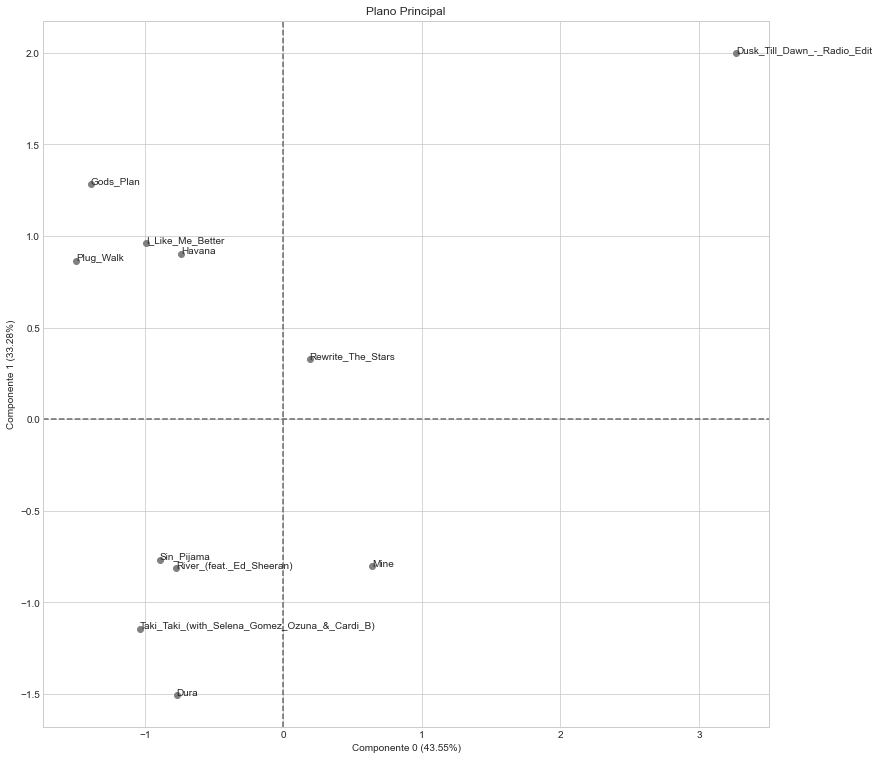

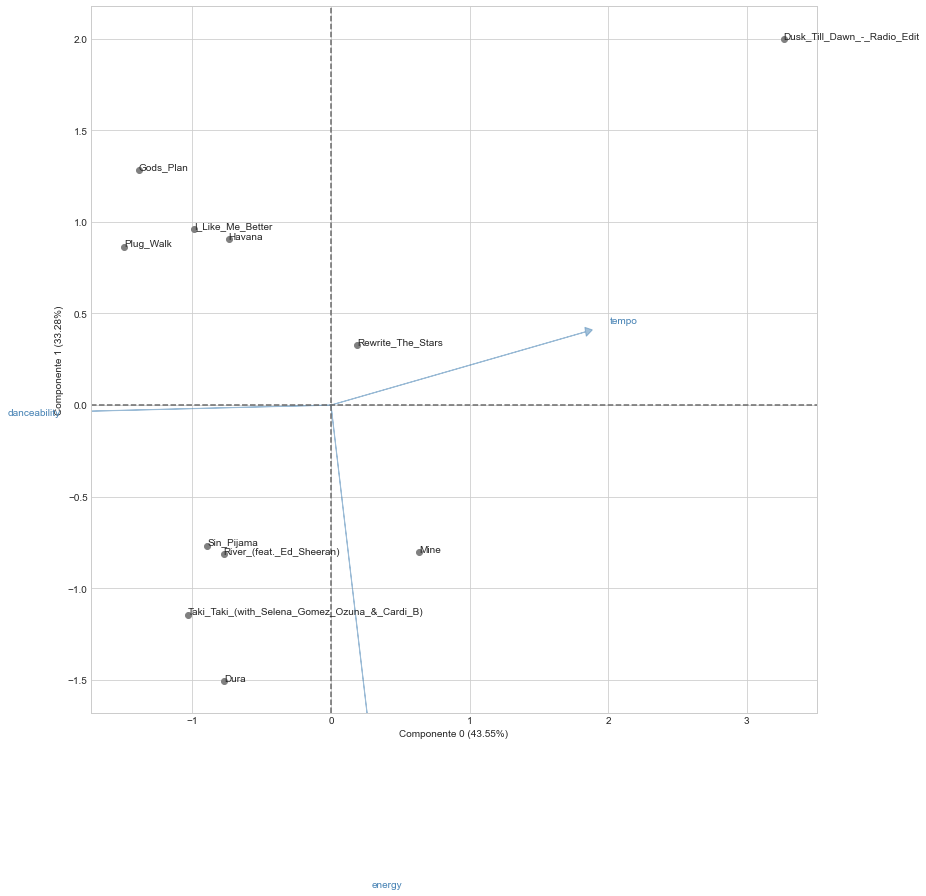

In [28]:
main1.execute_personalized_ACP(columns = ["energy", "danceability", "tempo"], cos2_min = 0.2)